# Insights, Visualization, and Recommendations

**Description:** Derive insights from sentiment and themes, visualize results, and recommend app improvements.

### Load Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load cleaned reviews with sentiment and themes
df = pd.read_csv('../data/bank_reviews_clean.csv')
df.head()

,review,rating,date,bank,source
0,the system works even from wherever I am abroa...,5,2025-06-15,CBE,Google Play
1,very nice to use this app,5,2025-06-14,CBE,Google Play
2,good 👍,4,2025-06-14,CBE,Google Play
3,Good service and have lightly internet accessed,3,2025-06-14,CBE,Google Play
4,the best mobile banking ever in Ethiopia,5,2025-06-13,CBE,Google Play


### Identify Drivers and Pain Points

In [8]:
df.columns

Index(['review', 'rating', 'date', 'bank', 'source'], dtype='object')

In [9]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['review'].apply(get_sentiment)

In [13]:
def extract_theme(text):
    if 'fast' in text.lower():
        return 'speed'
    elif 'crash' in text.lower():
        return 'stability'
    # Add more rules as needed
    return 'other'

df['theme'] = df['review'].apply(extract_theme)

In [14]:
# Identify top drivers (positive themes) and pain points (negative themes)
drivers = df[df['sentiment'] == 'positive']['theme'].value_counts().head(3)
pain_points = df[df['sentiment'] == 'negative']['theme'].value_counts().head(3)

print('Top Drivers:')
print(drivers)
print('\nTop Pain Points:')
print(pain_points)

Top Drivers:
theme
other        4868
speed         257
stability      34
Name: count, dtype: int64

Top Pain Points:
theme
other        609
stability     19
speed          2
Name: count, dtype: int64


### Compare Banks

In [17]:
# Compare sentiment and ratings between banks
bank_sentiment = df.groupby('bank')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
bank_ratings = df.groupby('bank')['rating'].mean()

display(bank_sentiment)
display(bank_ratings)

sentiment,negative,neutral,positive
bank,,,
BOA,0.180249,0.410355,0.409396
CBE,0.056852,0.344912,0.598236
Dashen,0.050218,0.244541,0.705240


bank
BOA       3.052733
CBE       4.042877
Dashen    4.475983
Name: rating, dtype: float64

## Recommendations

- Add a budgeting tool to help users manage finances.
- Improve app stability to reduce crashes.
- Enhance customer support responsiveness.
- Simplify navigation for faster access to key features.

###  Sentiment Trend Over Time

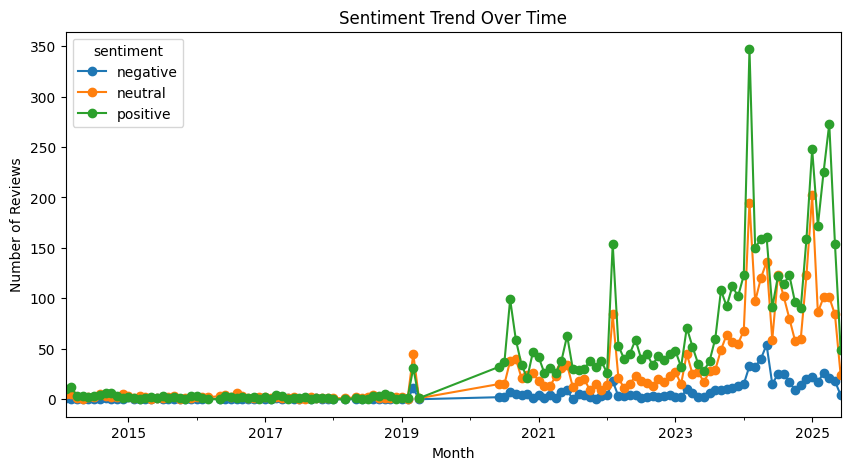

In [19]:
df['date'] = pd.to_datetime(df['date'])
sentiment_trend = df.groupby([df['date'].dt.to_period('M'), 'sentiment']).size().unstack().fillna(0)
sentiment_trend.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Sentiment Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

### Rating Distribution by Bank

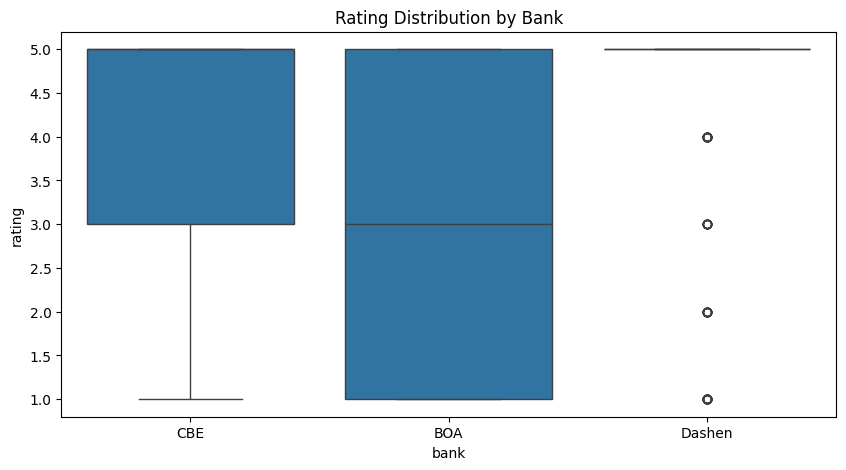

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bank', y='rating', data=df)
plt.title('Rating Distribution by Bank')
plt.show()

### Word Cloud for Positive Reviews

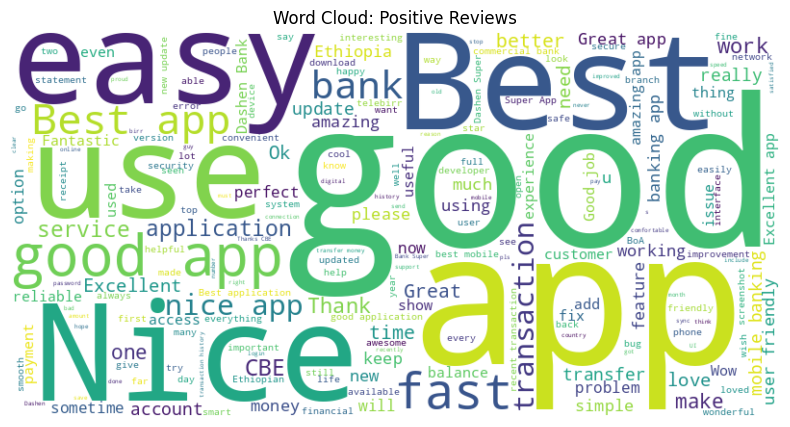

In [22]:
text = ' '.join(df[df['sentiment']=='positive']['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Positive Reviews')
plt.show()

### Average Sentiment Score by Bank

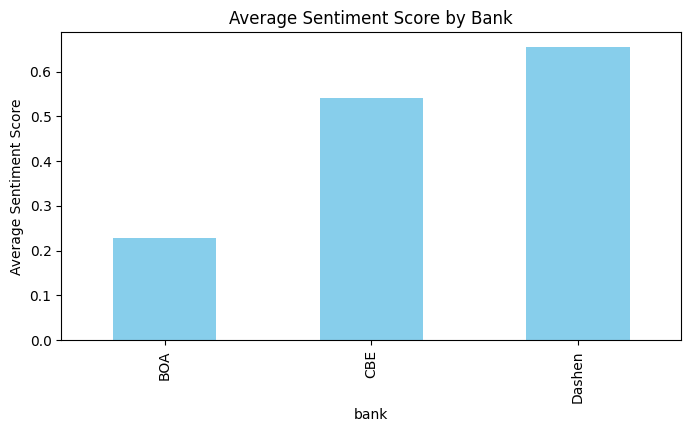

In [24]:
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_score'] = df['sentiment'].map(sentiment_map)
avg_sentiment = df.groupby('bank')['sentiment_score'].mean()
avg_sentiment.plot(kind='bar', color='skyblue', figsize=(8,4))
plt.title('Average Sentiment Score by Bank')
plt.ylabel('Average Sentiment Score')
plt.show()

## Ethics Note

- Reviews may be biased (e.g., more likely to post negative experiences).
- Some reviews may be fake or incentivized.
- Demographic or regional biases may exist in the data.